# Lab 07

In [12]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
import time

## Part 1

<class 'numpy.ndarray'>
(764, 1145, 3)


/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


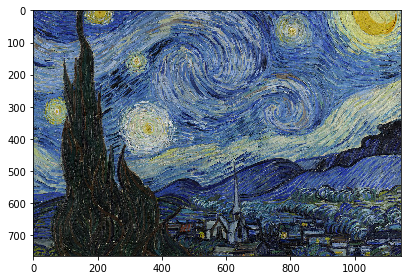

In [14]:
# Load image here. Display the image and the image shape.
pic=io.imread('starry.jpg')
print(type(pic))
print(pic.shape)
io.imshow(pic)
plt.show()


In [47]:
# Make the color arrays and display them on a labelled subplot.
redpic=np.copy(pic)
bluepic=np.copy(pic)
greenpic=np.copy(pic)

In [72]:
redpic[:,:,1]=0
redpic[:,:,2]=0

In [73]:
bluepic[:,:,0]=0
bluepic[:,:,1]=0

In [74]:
greenpic[:,:,0]=0
greenpic[:,:,2]=0


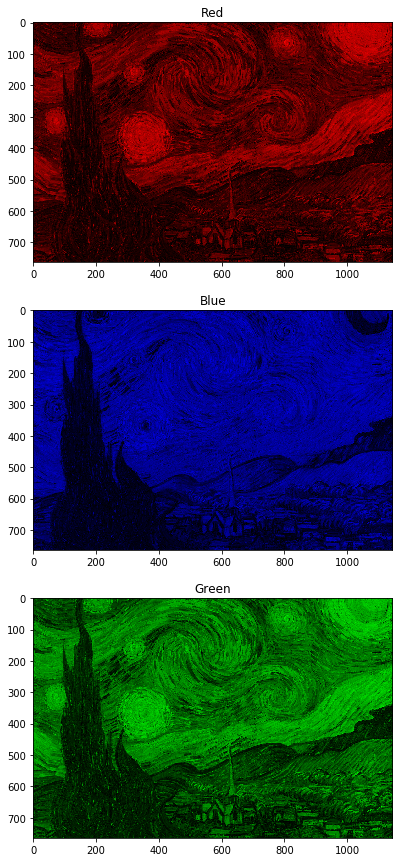

In [79]:
f, axarr = plt.subplots(3,figsize=(15,15))
axarr[0].imshow(redpic)
axarr[1].imshow(bluepic)
axarr[2].imshow(greenpic)
axarr[0].set_title('Red')
axarr[1].set_title('Blue')
axarr[2].set_title('Green')
plt.show()

## Part 2

In [80]:
from math import sqrt
from skimage.feature import blob_log, blob_doh
from skimage.color import rgb2gray

In [82]:
# Here is the image of the Hubble Deep Field. 
image = data.hubble_deep_field()[0:500, 0:500]
grayscale = rgb2gray(image)
#Convert the image to grayscale and display next to the original.

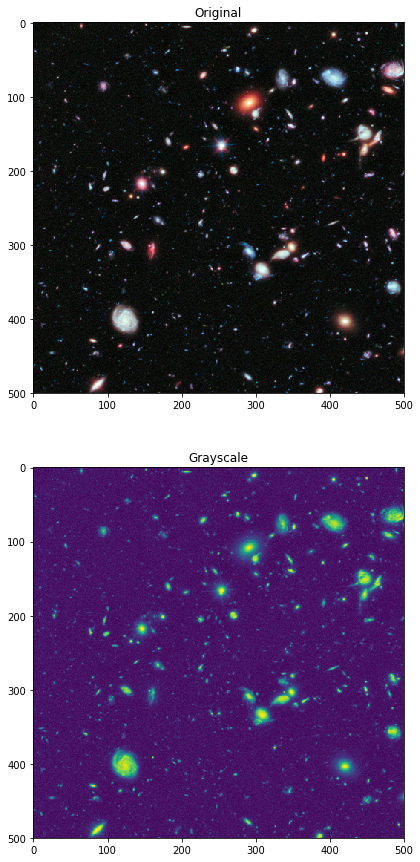

In [83]:
f, axarr = plt.subplots(2,figsize=(15,15))
axarr[0].imshow(image)
axarr[1].imshow(grayscale)
axarr[0].set_title('Original')
axarr[1].set_title('Grayscale')
plt.show()

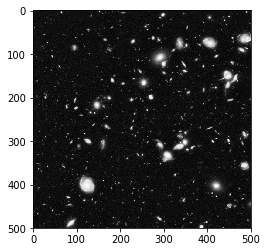

In [90]:
plt.imshow(grayscale, cmap='Greys_r')
plt.show()

In [96]:
# Apply the two Blob detection methods and measure the time taken by the algorithms.

start = time.time()

blobs_log = blob_log(grayscale, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

end = time.time()
print(end - start)

0.9538149833679199


In [97]:
start = time.time()
blobs_doh = blob_doh(grayscale, max_sigma=30, threshold=.01)

end = time.time()
print(end - start)

0.15494918823242188


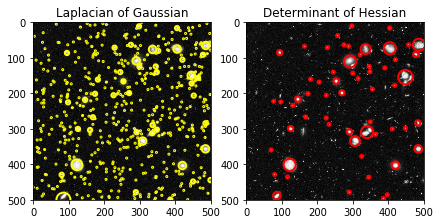

In [107]:
# Plot the 2 methods side-by-side along with circle patches. 
blobs_list = [blobs_log, blobs_doh]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian','Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(7, 7))
ax = axes.ravel()
for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(grayscale, cmap='Greys_r')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
plt.show()


#set fill=False for disks instead of circles 